In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Background

The Washington Post recently published an [article](https://www.washingtonpost.com/politics/2021/03/23/theres-no-migrant-surge-us-southern-border-heres-data/) titled "There’s no migrant ‘surge’ at the U.S. southern border. Here’s the data.". The authors argue that the increase in number of migrants at our southern border "...isn’t a surge or crisis, but a predictable seasonal shift." The authors reached their conclusions, however, without the use any statistical inference techniques that are commonplace when analyzing data.

It would be interesting to see what statistics say about this. Time series analysis is a branch of statistics that deals with data ordered in time like this, and is particularly well-suited for forecasting time series data with seasonal patterns. I used the python library developed by Facebook called [Prophet](https://facebook.github.io/prophet/) to analyze and forecast the migration data. 

# Data

The data that the Washington Post used is available from the [U.S. Customs and Border website](https://www.cbp.gov/newsroom/stats/southwest-land-border-encounters). Following the Washington Post article, we used the dataset on "Southwest Land Border Encounters", which aggregates unaccompanied minors, family unit aliens, single adults, and unaccompanied alien children. It might be interesting to do a separate analysis on only unaccompanied minors.

The data is also available in my githib account [link].

In [2]:
data = pd.read_csv('border_data.csv')

df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['Migrations']

df.head()

,ds,y
0,2011-10-01,31323
1,2011-11-01,28601
2,2011-12-01,24360
3,2012-01-01,30758
4,2012-02-01,36990


#### Run Prophet on the data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


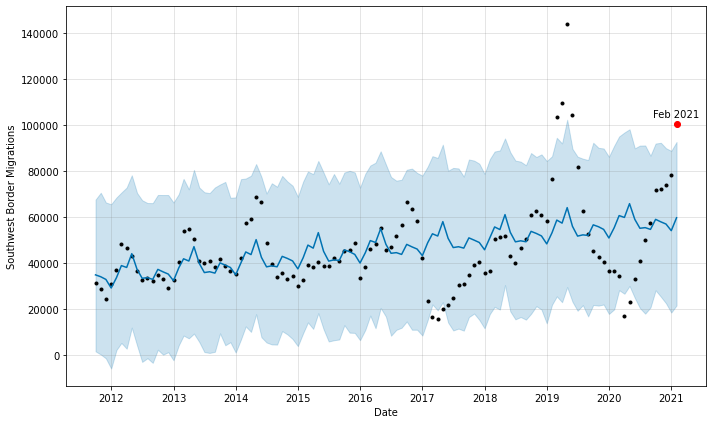

In [3]:
prophet = Prophet(interval_width=0.95)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=0, freq='M', include_history=True)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
plt.plot(df['ds'].iloc[-1], df['y'].iloc[-1], marker='o', ms=6, color='r')
plt.annotate('Feb 2021', (df['ds'].iloc[-1], df['y'].iloc[-1]*1.03), ha='center')
plt.xlabel('Date')
plt.ylabel('Southwest Border Migrations')
plt.show()

# Discussion of the Results

As the plot above shows, the February 2021 data, which is the most recent data available, is outside the 95% confidence interval of Prophet's forecast. It is unlikely the migration "surge" is due to chance or can be attributed to seasonal patterns.

Prophet decomposes the time series into trend and seasonal components. The second plot below shows the seasonal effects that the Washington Post article focuses on, and it certainly exists, but the magnitude is not large enought to explain the large increase in migrations in February.

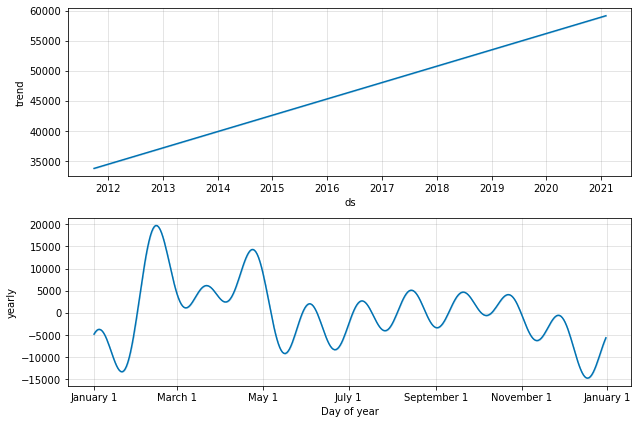

In [4]:
fig2 = prophet.plot_components(forecast)